#Implementation of a perceptron classifier to classify AND, OR and XOR

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class Perceptron:
  def __init__(self, input_size, learning_rate=0.01, max_iterations=20, initial_weights=None):
        if initial_weights is None:
            self.weights = np.random.randn(input_size + 1) * 0.01  # Initialize weights with small random values
        else:
            self.weights = initial_weights
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations

  def activation_function(self, x):
        return 1 if x >= 0 else 0  # Step function

  def predict(self, x):
        x_with_bias = np.append(x, 1)  # Add bias term
        weighted_sum = np.dot(self.weights, x_with_bias)
        return self.activation_function(weighted_sum)

  def update_weights(self, x, error):
        x_with_bias = np.append(x, 1)  # Add bias term
        self.weights += self.learning_rate * error * x_with_bias

  def train(self, X, y, verbose=False):
        for iteration in range(1, self.max_iterations + 1):
            misclassified = False
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                if error != 0:
                    self.update_weights(X[i], error)
                    misclassified = True
            if verbose:
                accuracy = np.mean([self.predict(x) == yi for x, yi in zip(X, y)])
                print(f"Iteration {iteration}: Weights = {self.weights}, Accuracy = {accuracy}")
            if not misclassified:
                break

In [36]:
if __name__ == '__main__':
    X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
    Y_and = np.array([0, 0, 0, 1])
    Y_or = np.array([0, 1, 1, 1])
    Y_xor = np.array([0, 1, 1, 0])

    perceptron_and = Perceptron(input_size=2)
    perceptron_and.train(X, Y_and)
    accuracy_and = np.mean([perceptron_and.predict(x) == y for x, y in zip(X, Y_and)])
    print("Accuracy for AND data:", accuracy_and)

    perceptron_or = Perceptron(input_size=2)
    perceptron_or.train(X, Y_or)
    accuracy_or = np.mean([perceptron_or.predict(x) == y for x, y in zip(X, Y_or)])
    print("Accuracy for OR data:", accuracy_or)

    perceptron_xor = Perceptron(input_size=2)
    perceptron_xor.train(X, Y_xor, verbose=True)
    accuracy_xor = np.mean([perceptron_xor.predict(x) == y for x, y in zip(X, Y_xor)])
    print("Accuracy for XOR data:", accuracy_xor)

Accuracy for AND data: 1.0
Accuracy for OR data: 1.0
Iteration 1: Weights = [ 0.01038763 -0.00112471 -0.00355643], Accuracy = 0.5
Iteration 2: Weights = [ 0.00038763 -0.00112471 -0.00355643], Accuracy = 0.5
Iteration 3: Weights = [ 0.00038763 -0.01112471 -0.00355643], Accuracy = 0.5
Iteration 4: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 5: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 6: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 7: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 8: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 9: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 10: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 11: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 12: Weights = [ 0.00038763 -0.01112471  0.00644357], Accuracy = 0.5
Iteration 13: Weight

The accuracy could not reach 100% for XOR because the data are not linearly separable, and as we keep updating the weights, the weights keeps oscillating without converging to optimal weights that is able to create a classifier for the data

#Implementation of a perceptron to classify students based on their grades

In [55]:
data = np.genfromtxt("bogus_student_data.txt", names=True)
data_x = np.stack((data["exercise_points"], data["exam_points"])).T
data_y = (data["grades"] > 2).astype(int)

In [58]:
# Train perceptrons for each target grade with different hyperparameters
perceptron1 = Perceptron(input_size=2)
perceptron1.train(data_x, data_y)
accuracy_p1 = np.mean([perceptron1.predict(x) == y for x, y in zip (data_x, data_y)])
print("Accuracy for perceptron 1:", accuracy_p1)

perceptron2 = Perceptron(input_size=2, learning_rate=0.05, max_iterations=200)
perceptron2.train(data_x, data_y)
accuracy_p2 = np.mean([perceptron2.predict(x) == y for x, y in zip (data_x, data_y)])
print("Accuracy for perceptron 2:", accuracy_p2)

perceptron3 = Perceptron(input_size=2, learning_rate=0.05, initial_weights=np.array([0.1, 0.2, 0.3]), max_iterations=200)
perceptron3.train(data_x, data_y)
accuracy_p3 = np.mean([perceptron3.predict(x) == y for x, y in zip (data_x, data_y)])
print("Accuracy for perceptron 3:", accuracy_p3)

Accuracy for perceptron 1: 0.7545
Accuracy for perceptron 2: 0.8645
Accuracy for perceptron 3: 0.959


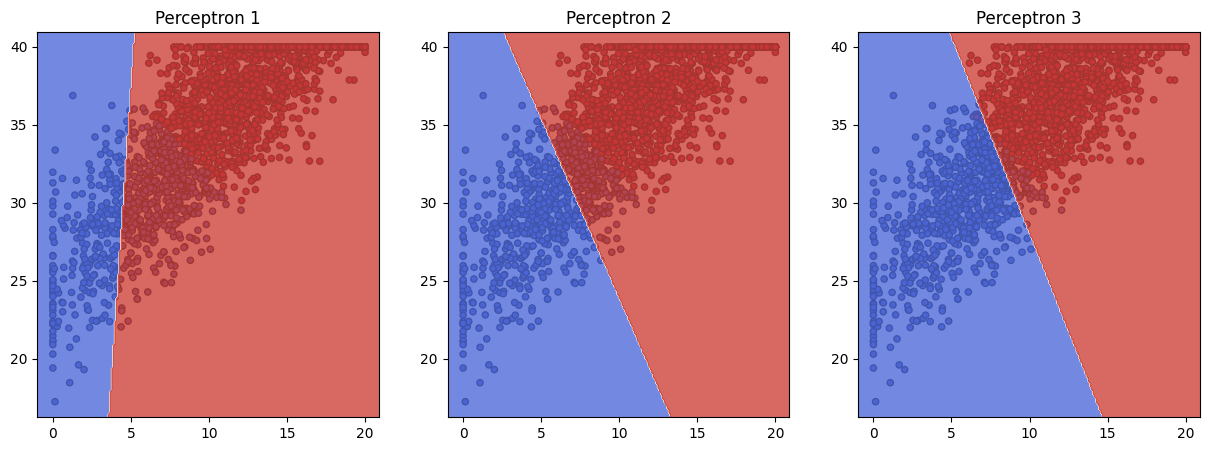

In [60]:
# Function to plot decision boundary
def plot_decision_boundary(weights, ax):
    # Plotting the data points
    ax.scatter(data_x[:, 0], data_x[:, 1], c=data_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Creating meshgrid for decision boundary
    x_min, x_max = data_x[:, 0].min() - 1, data_x[:, 0].max() + 1
    y_min, y_max = data_x[:, 1].min() - 1, data_x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Adding bias term to the input features
    X_with_bias = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel())]

    # Calculating decision boundary
    Z = np.dot(X_with_bias, weights)
    Z = np.where(Z >= 0, 1, 0)
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plotting decision boundaries and data points
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_decision_boundary(perceptron1.weights, axs[0])
axs[0].set_title('Perceptron 1')

plot_decision_boundary(perceptron2.weights, axs[1])
axs[1].set_title('Perceptron 2')

plot_decision_boundary(perceptron3.weights, axs[2])
axs[2].set_title('Perceptron 3')

plt.show()

The weights are good enough based on their hyper-parameter. The last classifier is at 95% with further hyper-parameter tuning I believe it can get to 99% accuracy.